#### Project 4 - Image segmentation

We will first load the preliminaries

In [10]:
using PyPlot

function test_image(ver, m=50, noise=0)
    A = 0.8*ones(Float64, m, m)
    if ver == 1
        i = 1:m
        sc = m/100
        for c in [[50,60,20], [65,60,15], [35,30,15]]
            A = @. max(0.2, A - 0.6*Float64((i - sc*c[1])^2 + 
                    (i' - sc*c[2])^2 < (sc*c[3])^2))
        end
    elseif ver == 2
        is = [[25,35,25,35], [65,75,65,75], [65,75,45,50], [40,45,40,70]]
        for i in is
            i = round.(Int, i*m/100)
            A[i[1]:i[2], i[3]:i[4]] .= 0.3
        end
    else
        error("Unknown image version")
    end
    
    A += noise*randn(size(A))
    A = min.(max.(A, 0), 1)
end

test_image (generic function with 3 methods)

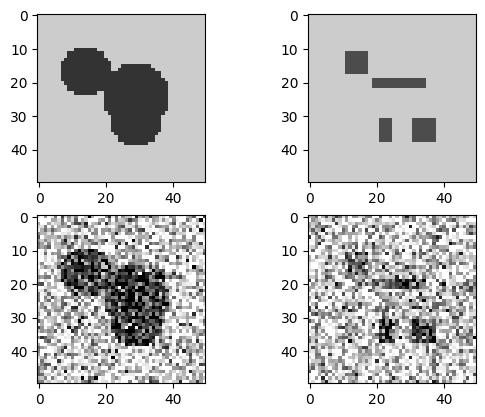

In [11]:
#This is a test case with no noise (top row) and with noise of magnitude 0.3 (bottom row).
count = 0
m = 50
for noise = [0, 0.3], ver = 1:2
    subplot(2,2,count+=1)
    A = test_image(ver, m, noise)
    imshow(A[:,:,[1,1,1]])
end

##### Level sets and contour plotting

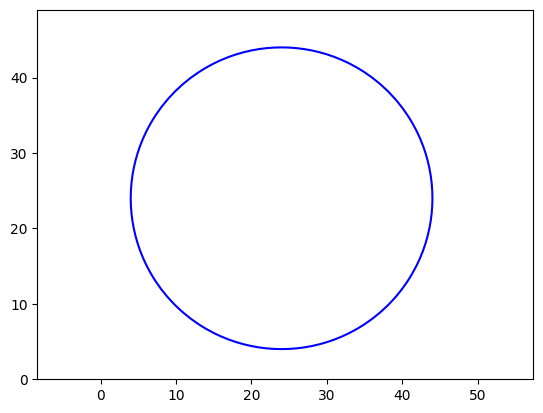

In [12]:
function initial_value(sz)
    m,n = sz
    Φ = [sqrt((i - m/2)^2 + (j - n/2)^2) - 0.4n for i = 1:m, j = 1:n]
end

# Test case
Φ = initial_value([50,50])
contour(Φ, [0.0], colors="b")
axis("equal");

#### Problem 1 - A type hierarchy for stencil operations

In [13]:
# We will first set up the stencil type
abstract type AbstractStencil end

#Define the mean filter subtype
struct AverageStencil <: AbstractStencil end

#Average of the 9 pixels
apply_to_3x3(s::AverageStencil, A33) = sum(A33) / length(A33)

function stencil_demo(s::AbstractStencil)
    count = 0
    plot_next(A) = subplot(1,4,count+=1), imshow(A[:,:,[1,1,1]])
    for noise = [0, 0.3]
        A = test_image(1, 50, noise)
        plot_next(A)
        plot_next(apply_stencil(s,A))
    end
end


stencil_demo (generic function with 1 method)

##### Problem 1(a)

In [14]:
function apply_stencil(s::AbstractStencil, A)
    B = 0*A
    for i = 2:size(A,1)-1, j = 2:size(A,2)-1
        B[i,j] = apply_to_3x3(s,A[i-1:i+1, j-1:j+1])
    end
    return B
end

apply_stencil (generic function with 1 method)

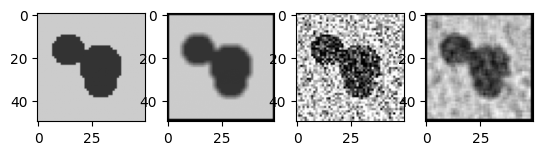

In [15]:
# Test code
stencil_demo(AverageStencil())

##### Problem 1(b)